In [1]:
#Import required lbraries to process the data and plot
import pandas as pd
import numpy as np
import math
import scipy.optimize
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
# from statsmodels.stats.weightstats import DescrStatsW

In [2]:
import os
import os.path
import shutil
import glob

In [3]:
from scipy import stats
from scipy.signal import savgol_filter
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
plt.rcParams.update({'font.size': 16})

import dill
dill.dump_session('notebook_env.db')

# SCADA data

## read piclked sensor data

In [7]:
WVL = pd.read_pickle('./Jianing_WVL.pkl')

In [8]:
BEV = pd.read_pickle('./Jianing_BEV.pkl')

In [9]:
SPE = pd.read_pickle('./Jianing_SPE.pkl')

In [6]:
FLT = pd.read_pickle('./Jianing_FLT.pkl')

## WVL 

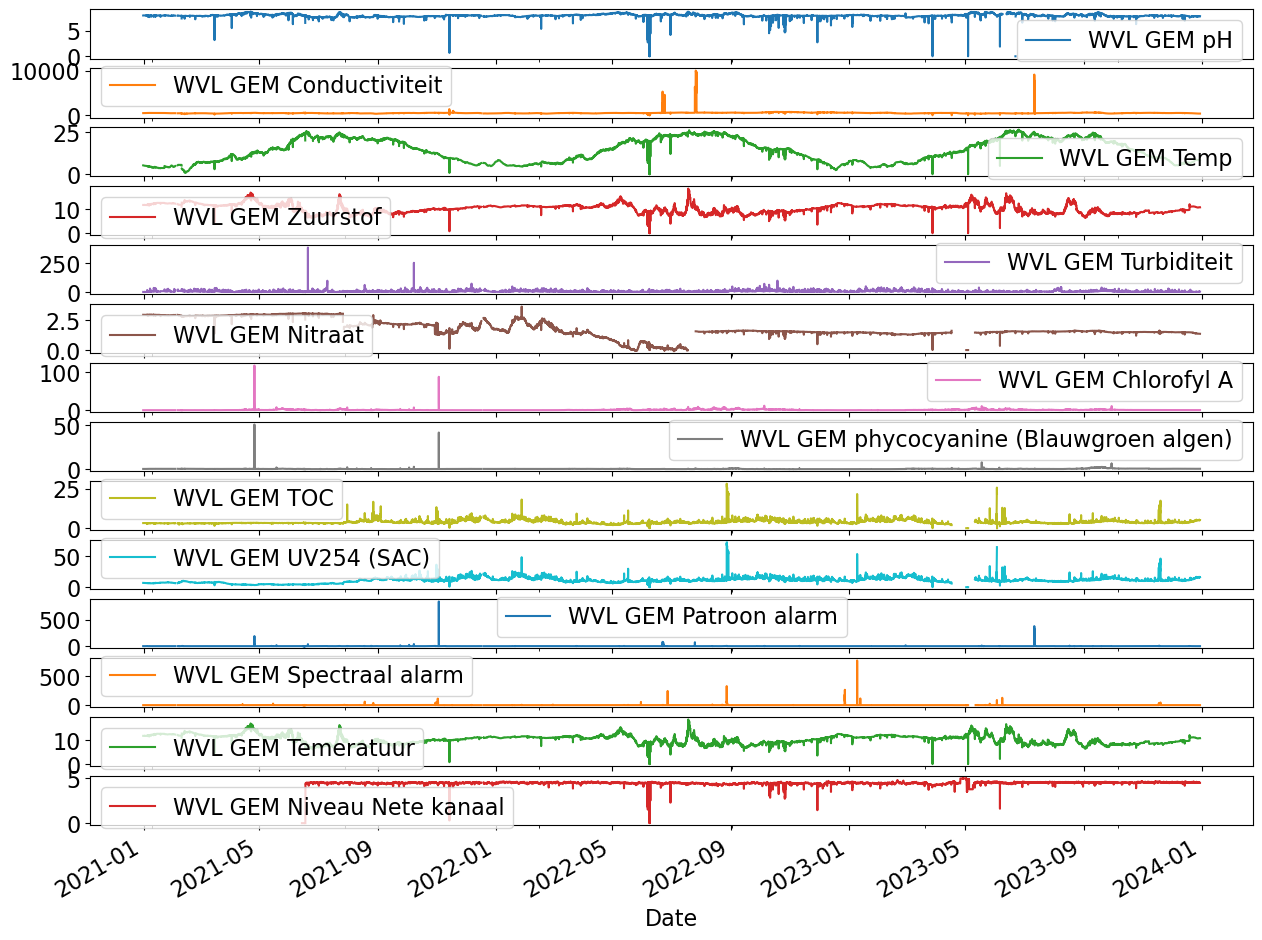

In [11]:
# period = '2023-06'
ax1 = WVL.plot(figsize=(15,12), subplots=True);

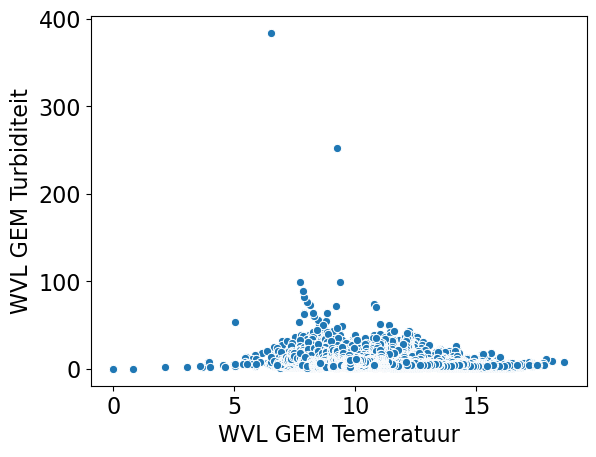

In [14]:
ax1 = sns.scatterplot(WVL['WVL GEM Temeratuur'], WVL['WVL GEM Turbiditeit'])
# ax1.set_ylim(0,10)

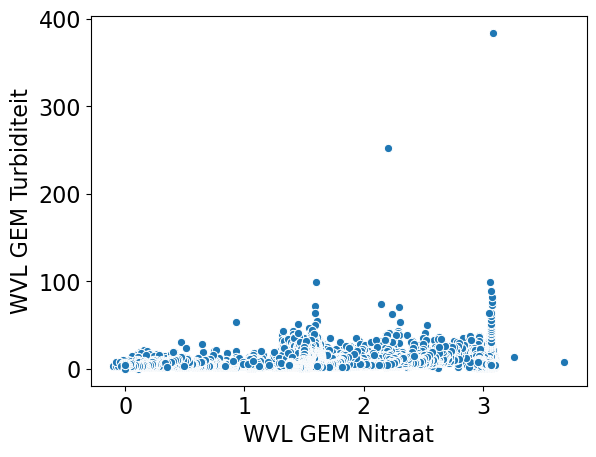

In [15]:
ax1 = sns.scatterplot(WVL['WVL GEM Nitraat'], WVL['WVL GEM Turbiditeit'])
# ax1.set_ylim(0,10)

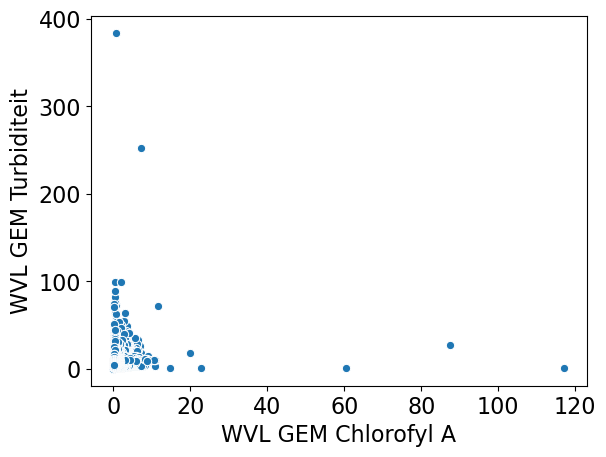

In [18]:
ax1 = sns.scatterplot(WVL['WVL GEM Chlorofyl A'], WVL['WVL GEM Turbiditeit'])
# ax1.set_ylim(0,10)

(0.0, 50.0)

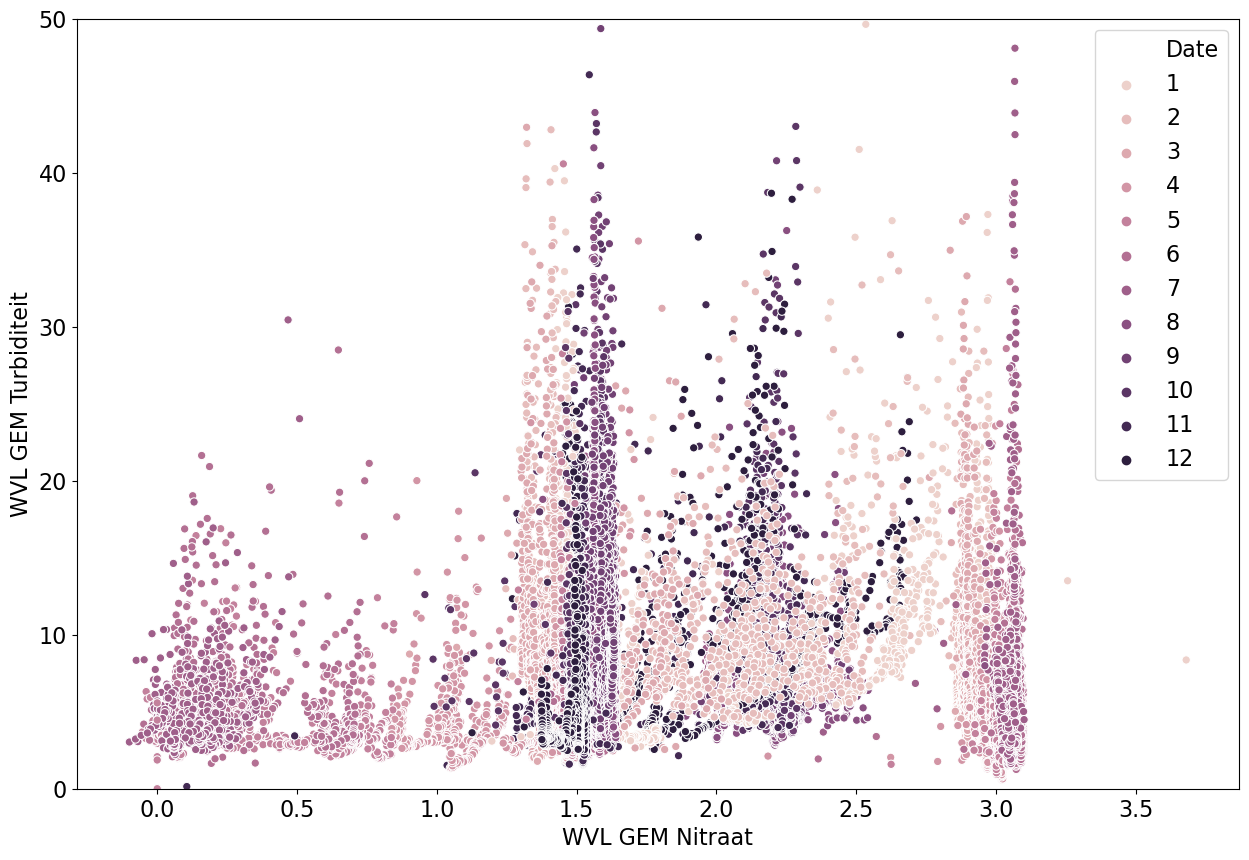

In [23]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1 = sns.scatterplot(WVL['WVL GEM Nitraat'], WVL['WVL GEM Turbiditeit'], 
                      hue=WVL.index.month, legend='full')
# ax1.fig
ax1.set_ylim(0,50)

(0.0, 10.0)

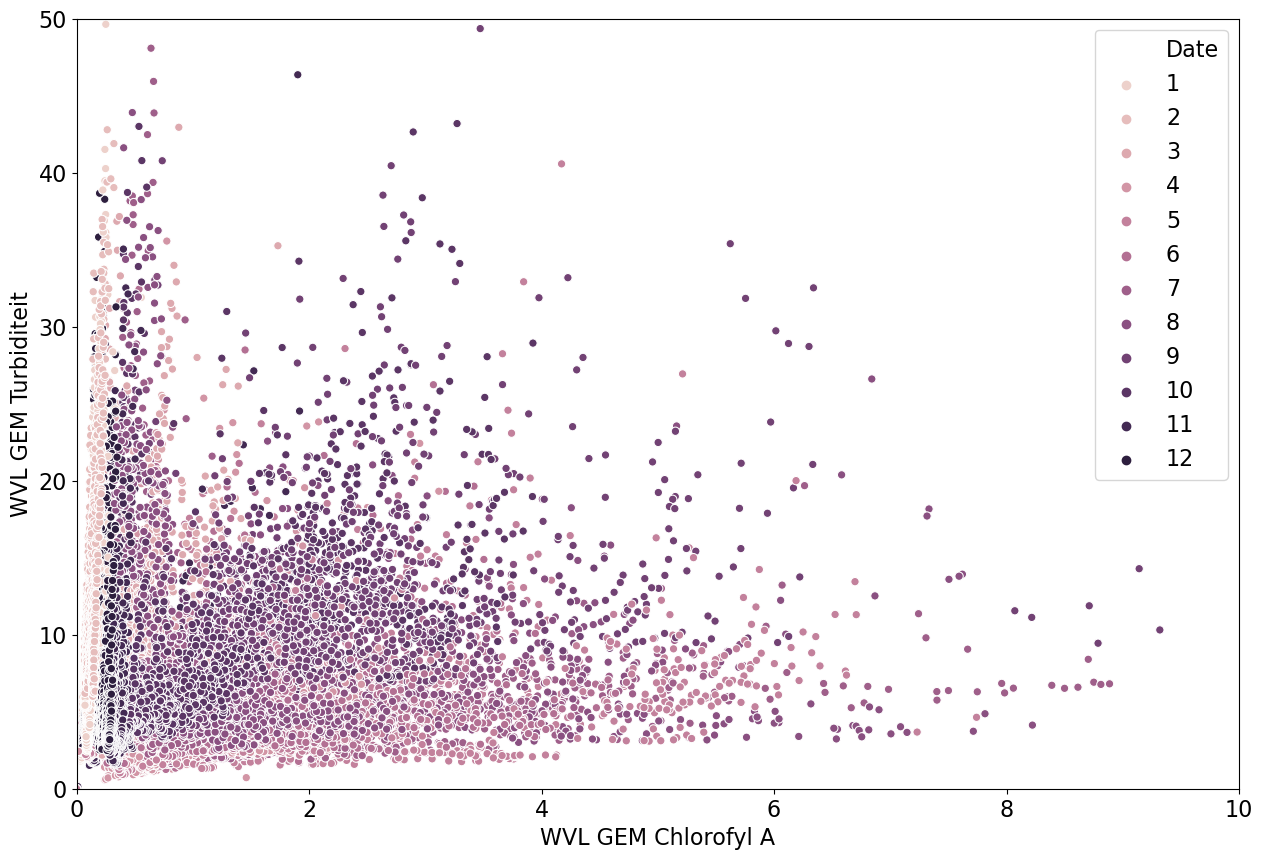

In [21]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1 = sns.scatterplot(WVL['WVL GEM Chlorofyl A'], WVL['WVL GEM Turbiditeit'], 
                      hue=WVL.index.month, legend='full')
# ax1.fig
ax1.set_ylim(0,50)
ax1.set_xlim(0,10)

(7.0, 9.0)

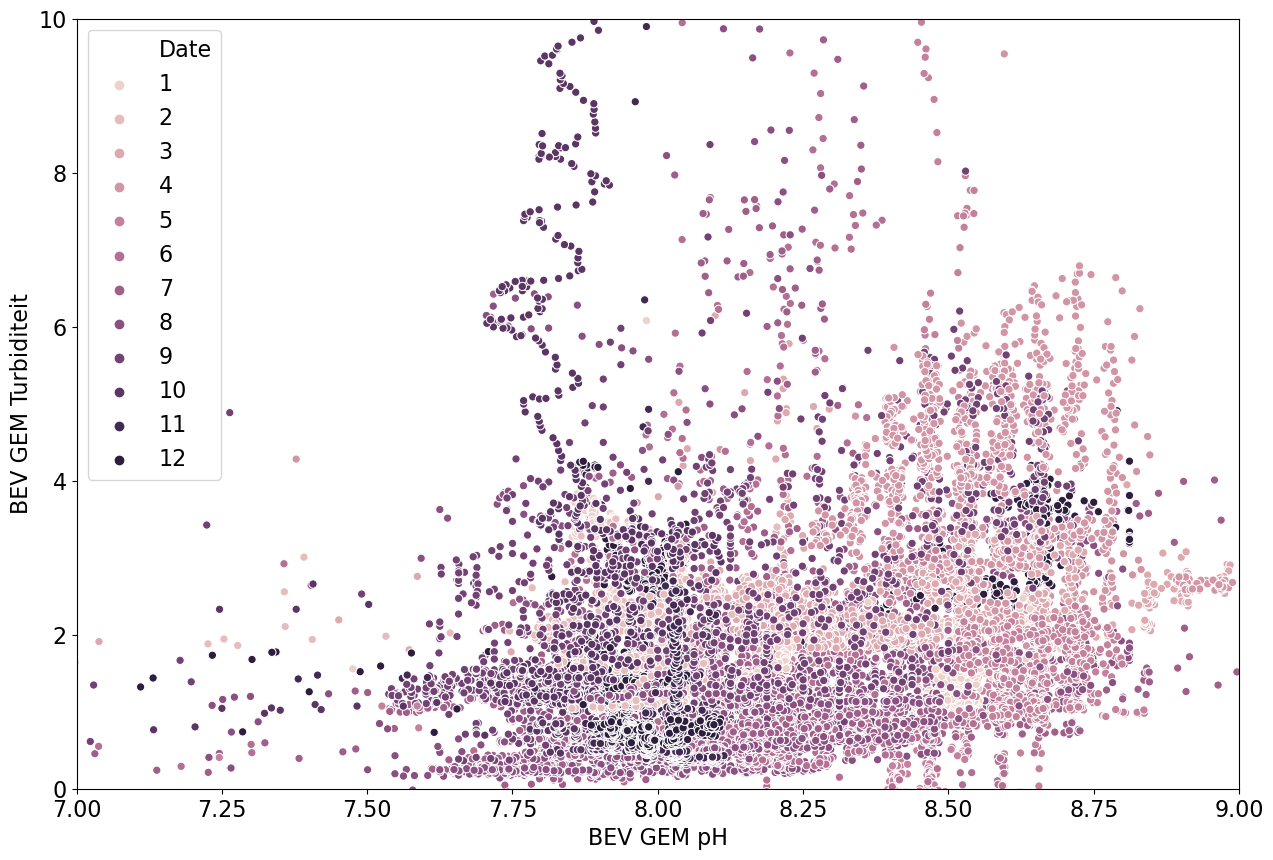

In [24]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1 = sns.scatterplot(BEV['BEV GEM pH'], BEV['BEV GEM Turbiditeit'], 
                      hue=BEV.index.month, legend='full')
# ax1.fig
ax1.set_ylim(0,10)
ax1.set_xlim(7,9)

## BEV

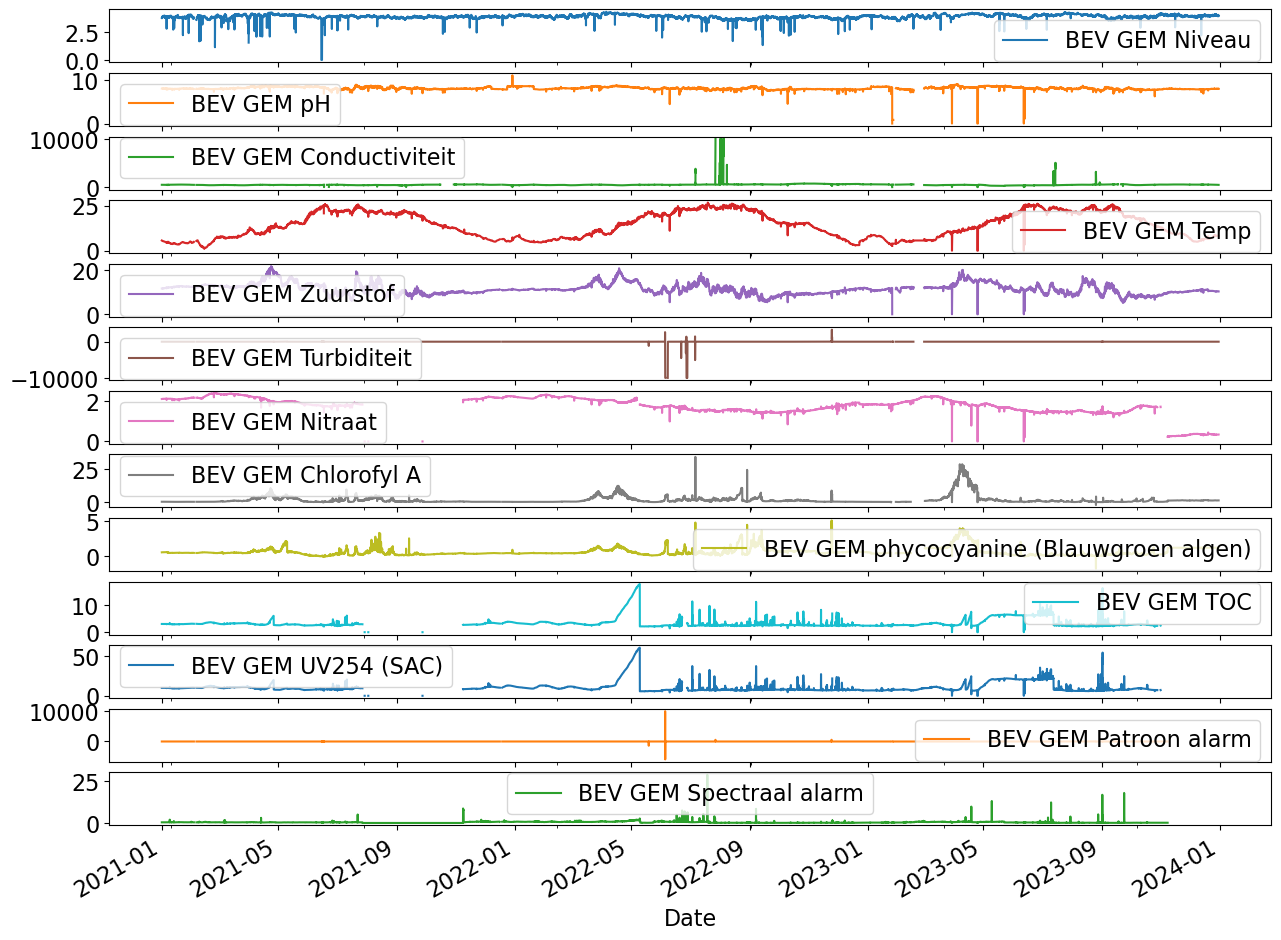

In [25]:
# period = '2023-06'
ax1 = BEV.plot(figsize=(15,12), subplots=True);

(0.0, 10.0)

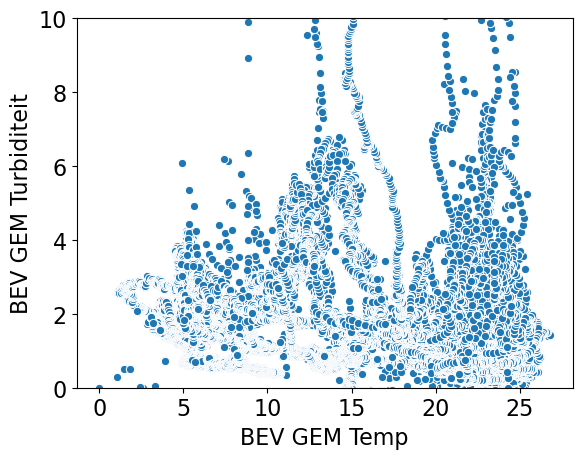

In [28]:
ax1 = sns.scatterplot(BEV['BEV GEM Temp'], BEV['BEV GEM Turbiditeit'])
ax1.set_ylim(0,10)

(0.0, 10.0)

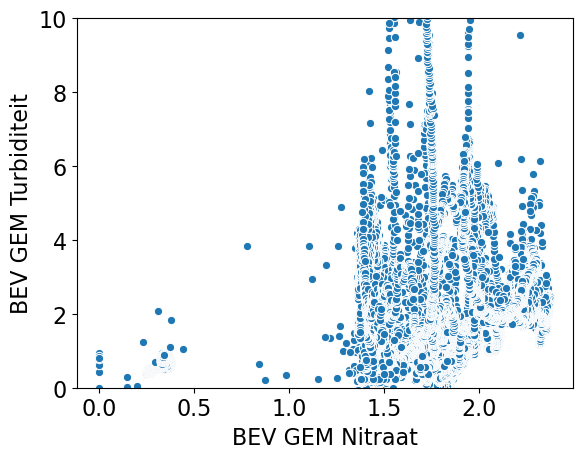

In [31]:
ax1 = sns.scatterplot(BEV['BEV GEM Nitraat'], BEV['BEV GEM Turbiditeit'])
ax1.set_ylim(0,10)

(0.0, 10.0)

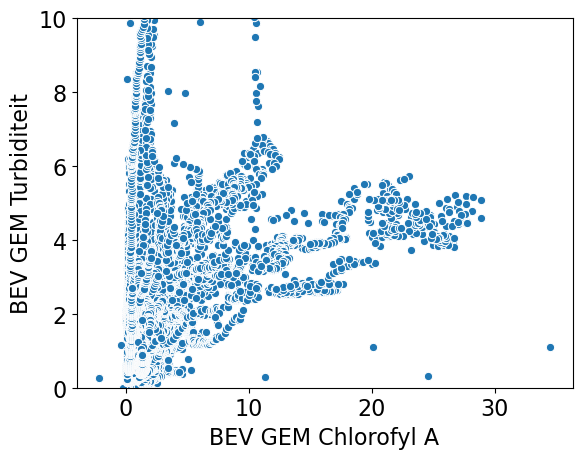

In [33]:
ax1 = sns.scatterplot(BEV['BEV GEM Chlorofyl A'], BEV['BEV GEM Turbiditeit'])
ax1.set_ylim(0,10)

(0.0, 10.0)

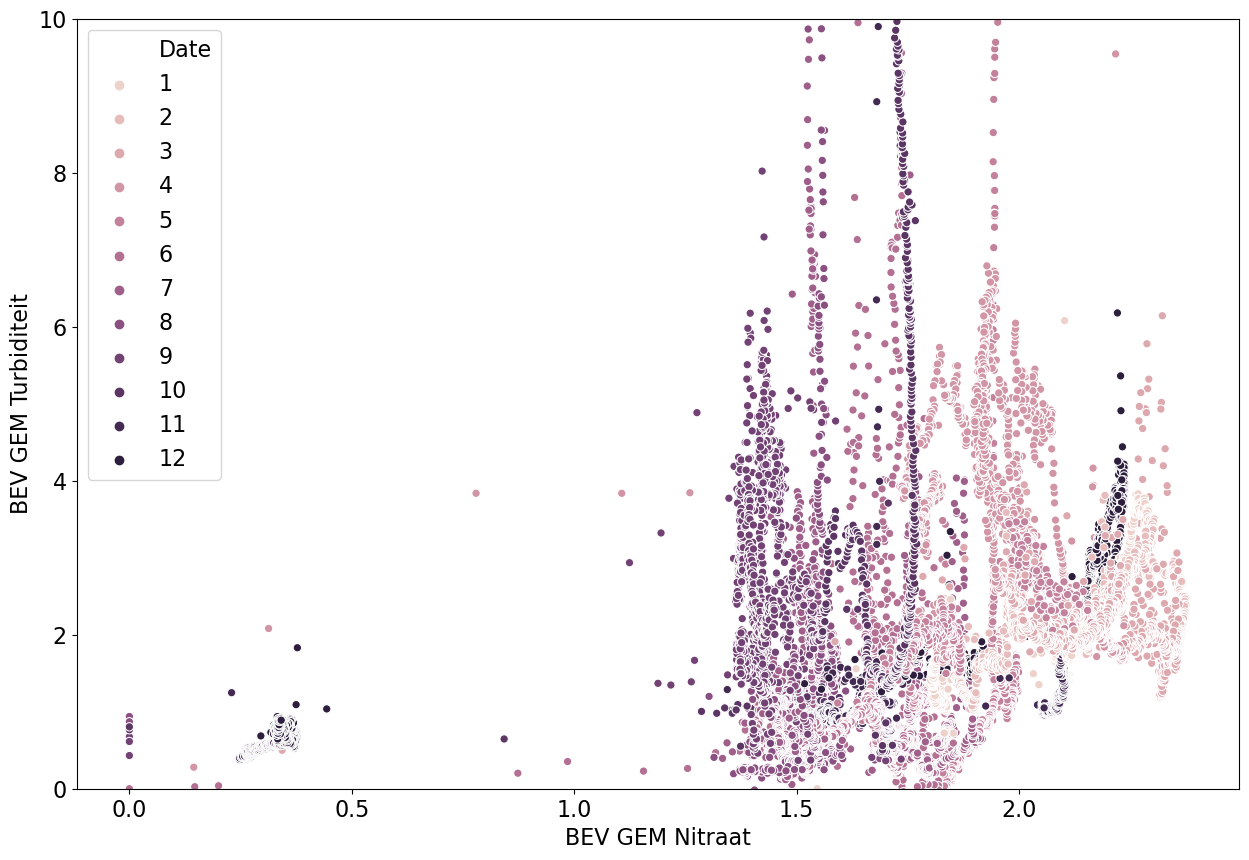

In [36]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1 = sns.scatterplot(BEV['BEV GEM Nitraat'], BEV['BEV GEM Turbiditeit'], 
                      hue=BEV.index.month, legend='full')
# ax1.fig
ax1.set_ylim(0,10)

(0.0, 50.0)

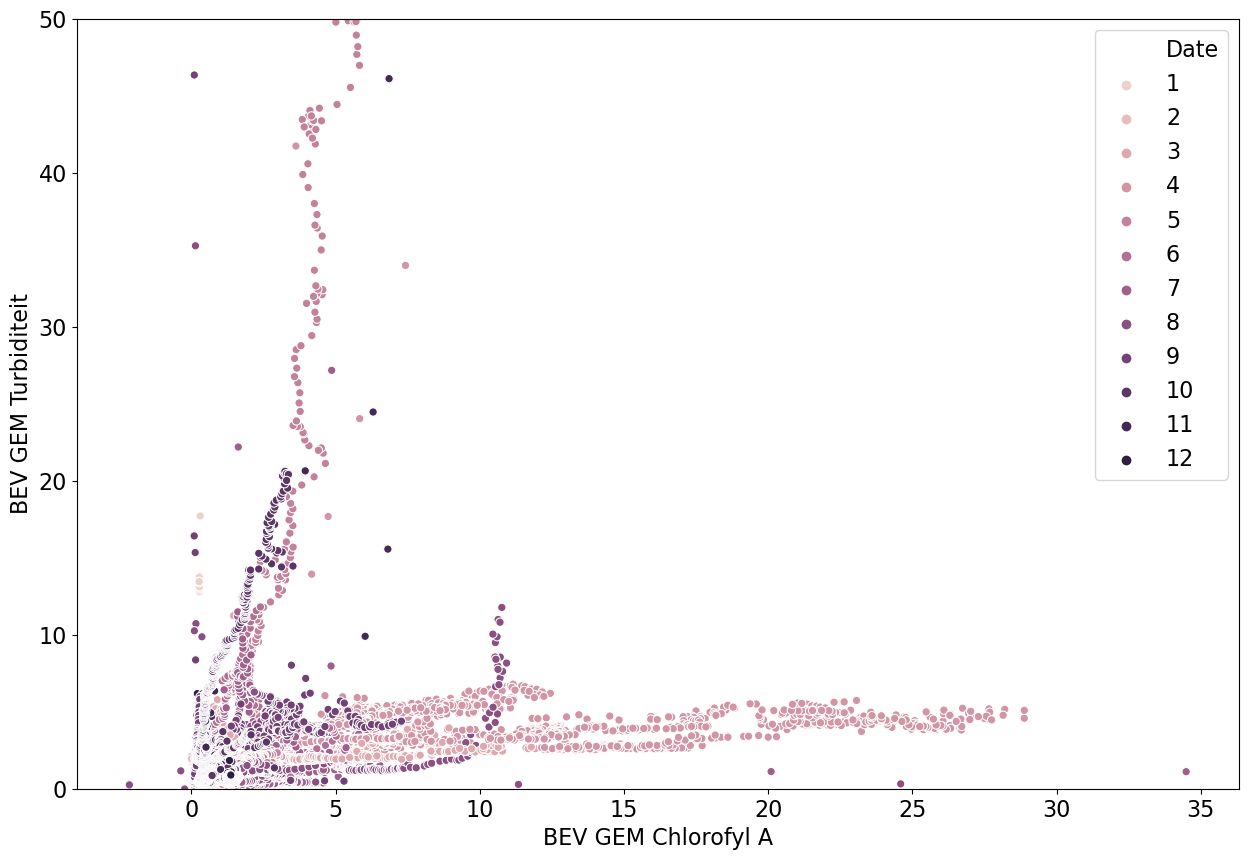

In [38]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1 = sns.scatterplot(BEV['BEV GEM Chlorofyl A'], BEV['BEV GEM Turbiditeit'], 
                      hue=BEV.index.month, legend='full')
# ax1.fig
ax1.set_ylim(0,50)
# ax1.set_xlim(0,10)

## SPE

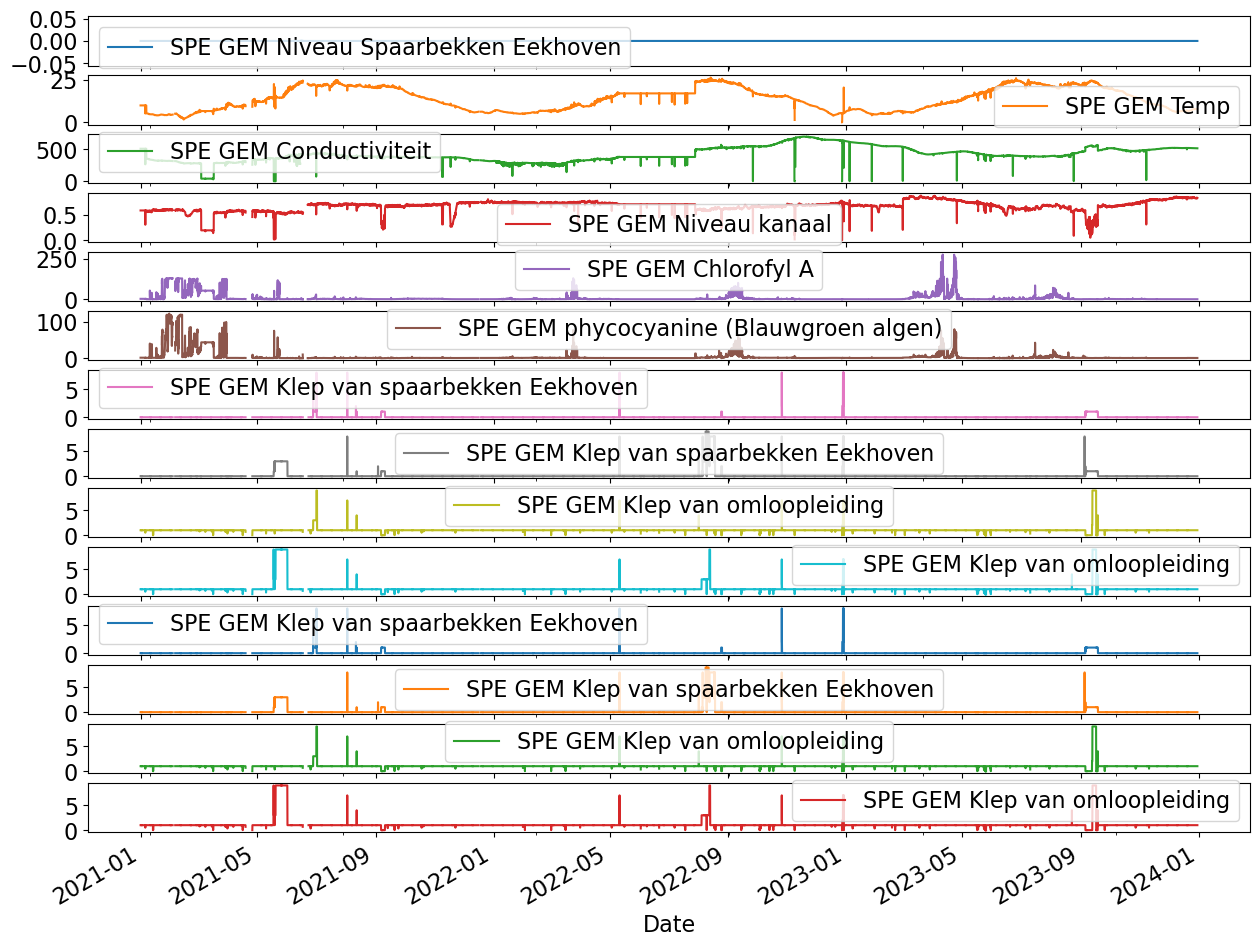

In [39]:
# period = '2023-06'
ax1 = SPE.plot(figsize=(15,12), subplots=True);

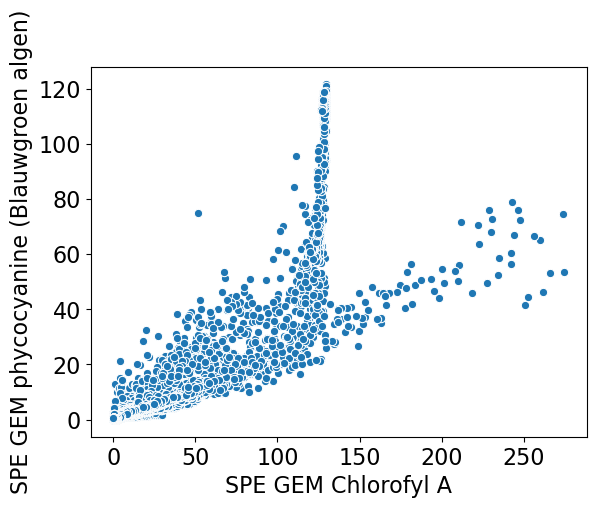

In [42]:
ax1 = sns.scatterplot(SPE['SPE GEM Chlorofyl A'], SPE['SPE GEM phycocyanine (Blauwgroen algen)'])
# ax1.set_ylim(0,10)

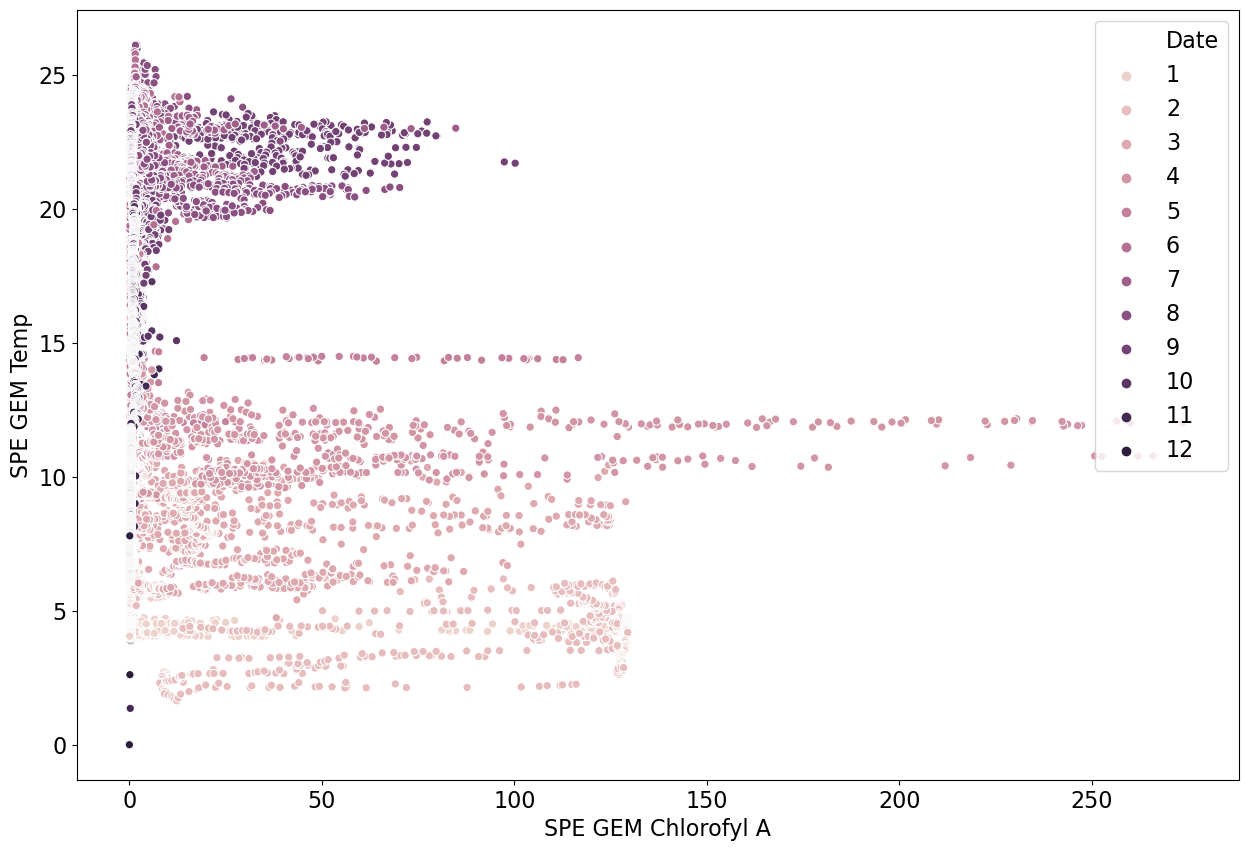

In [44]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1 = sns.scatterplot(SPE['SPE GEM Chlorofyl A'], SPE['SPE GEM Temp'], 
                      hue=BEV.index.month, legend='full')
# ax1.fig
# ax1.set_ylim(0,10)

## FLT

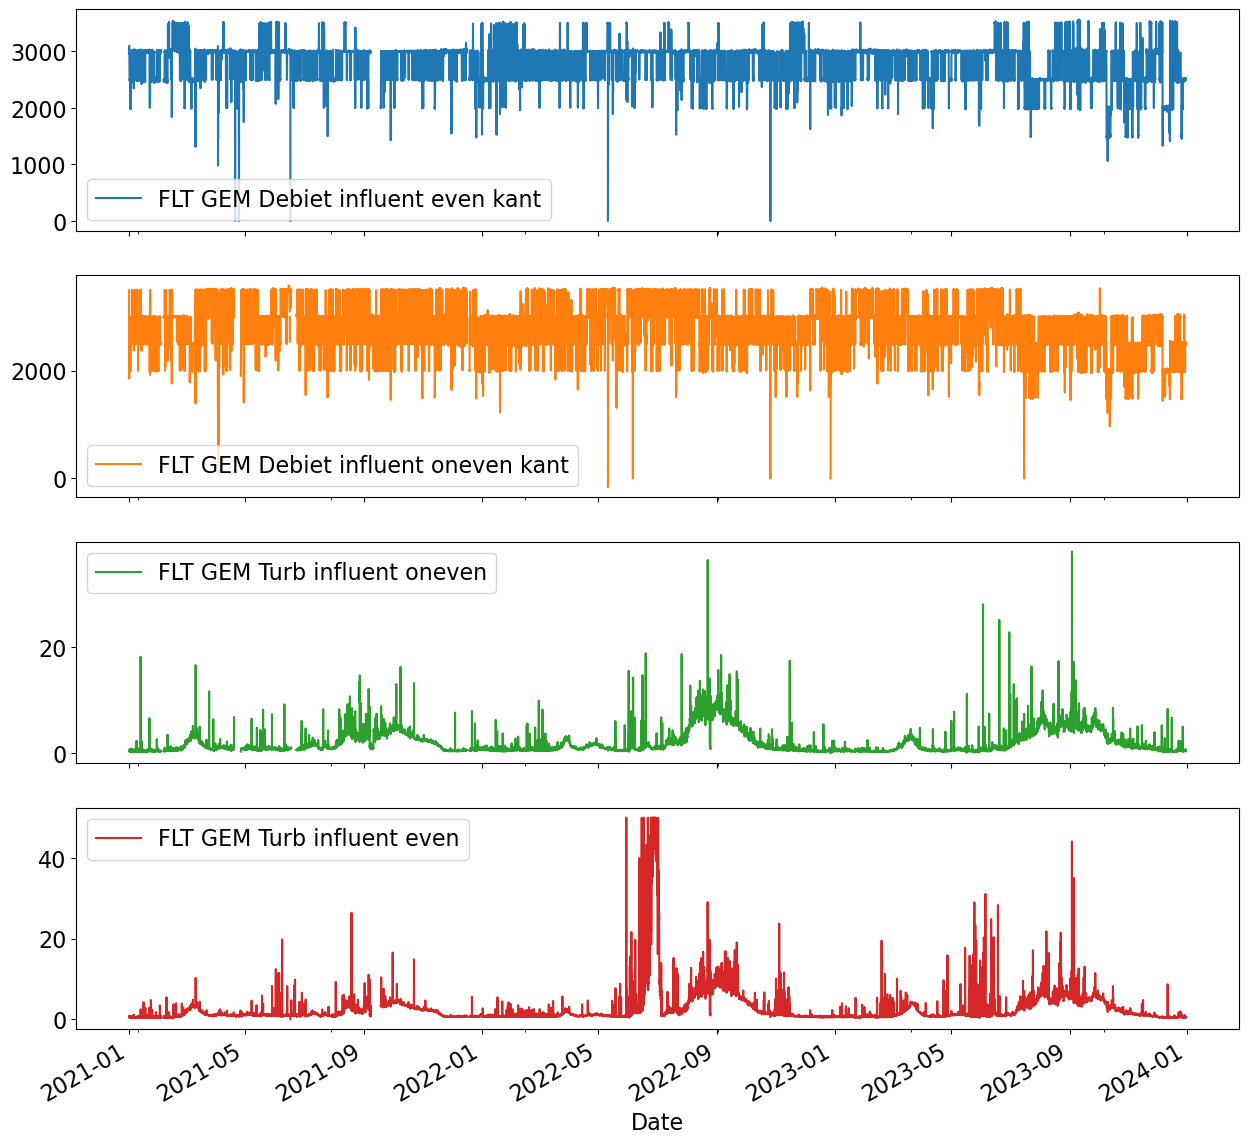

In [46]:
# period = '2023-06'
FLT.plot(figsize=(15,15), subplots=True);

# Weather data

In [49]:
Weather = pd.read_excel('./openMeteo/open-meteo-51.70N4.26E1m.xlsx', 
                                  index_col=0,
                                  sheet_name = 'Sheet1',
                           skiprows = 3 #[0,1,3],
#                          nrows = 159,
#                            index_col = None,
# #                        header=[0, 1]
#                            names = ['Date', 'CZV', 'BZV5', 'NKj','Ntot', 'OB'], # concentrations in mg/L and mgN/L
#                            usecols = ('A:S'),
                )

Text(0, 0.5, 'Wind Velocity [m/s]')

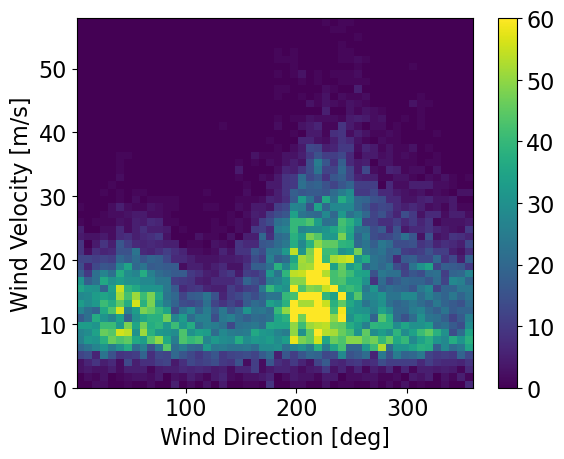

In [218]:
plt.hist2d(Weather['wind_direction_10m (°)'], Weather['wind_speed_10m (km/h)'], bins=(50, 50), vmax=60)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [km/h]')

## comparison of weather data with SCADA

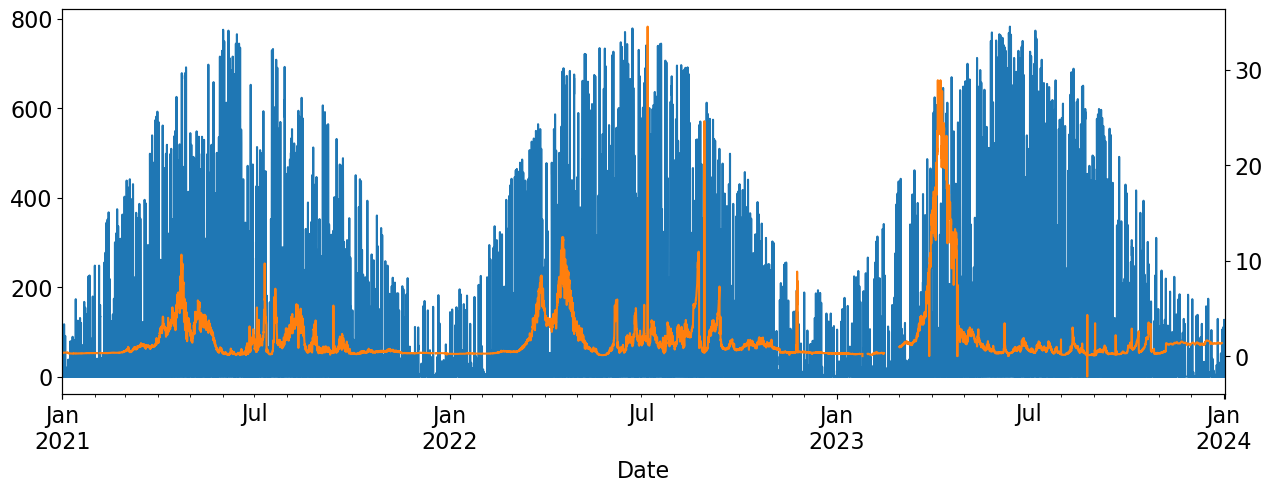

In [50]:
ax1 = Weather['direct_radiation (W/m²)'].plot(figsize=(15,5))
BEV['BEV GEM Chlorofyl A'].plot(ax=ax1, secondary_y=True);

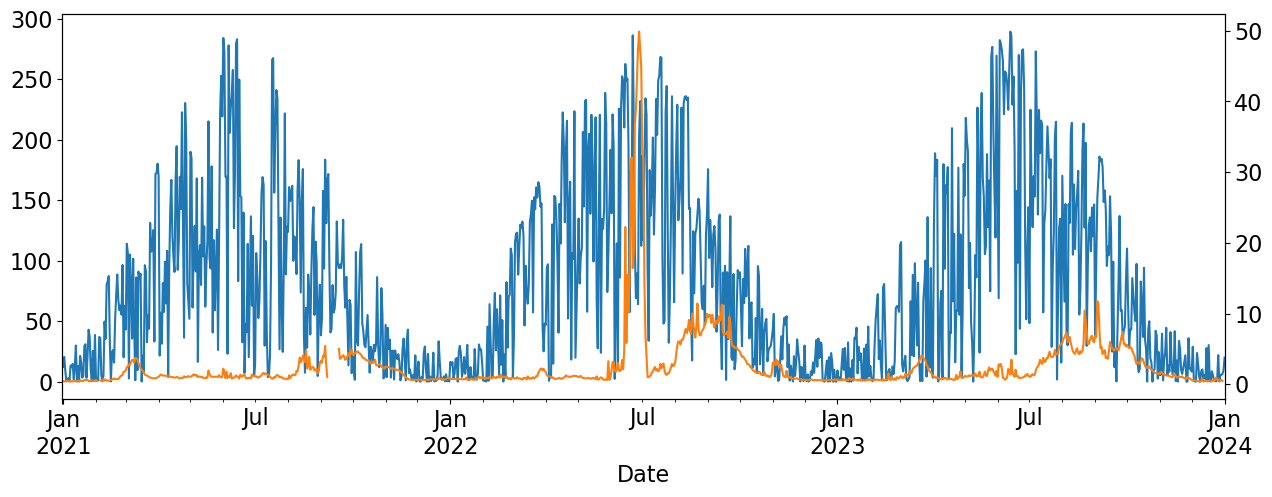

In [52]:
ax1 = Weather['direct_radiation (W/m²)'].resample('d').mean().plot(figsize=(15,5))
FLT['FLT GEM Turb influent even'].resample('d').mean().plot(ax=ax1, secondary_y=True);

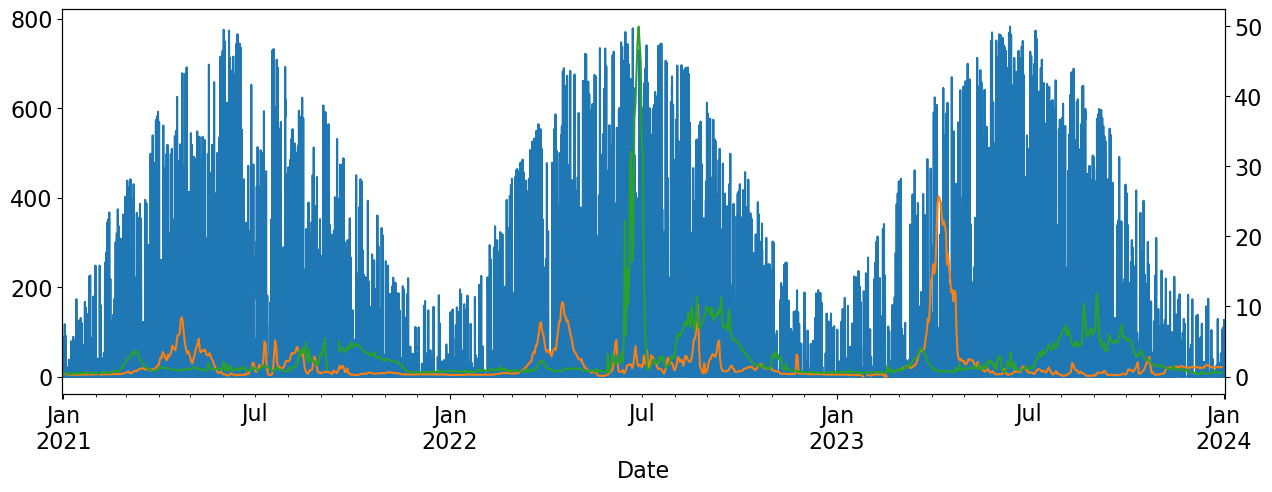

In [54]:
ax1 = Weather['direct_radiation (W/m²)'].plot(figsize=(15,5))
# SCADA_data['SPE GEM Chlorofyl A'].resample('d').mean().plot(ax=ax1, secondary_y=True);
BEV['BEV GEM Chlorofyl A'].resample('d').mean().plot(ax=ax1, secondary_y=True);
FLT['FLT GEM Turb influent even'].resample('d').mean().plot(ax=ax1, secondary_y=True);

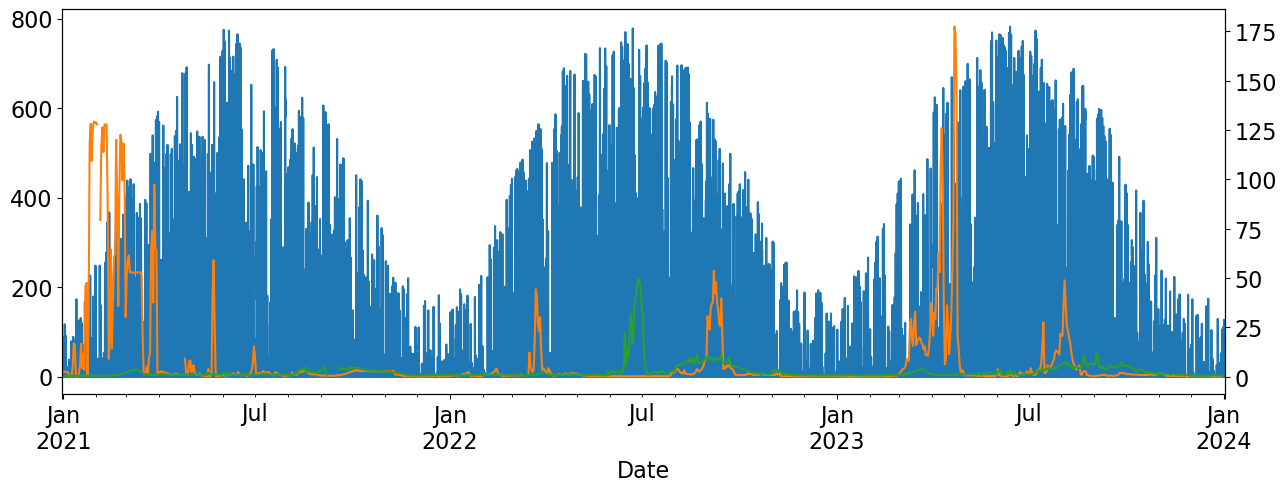

In [55]:
ax1 = Weather['direct_radiation (W/m²)'].plot(figsize=(15,5))
# SCADA_data['SPE GEM Chlorofyl A'].resample('d').mean().plot(ax=ax1, secondary_y=True);
SPE['SPE GEM Chlorofyl A'].resample('d').mean().plot(ax=ax1, secondary_y=True);
FLT['FLT GEM Turb influent even'].resample('d').mean().plot(ax=ax1, secondary_y=True);

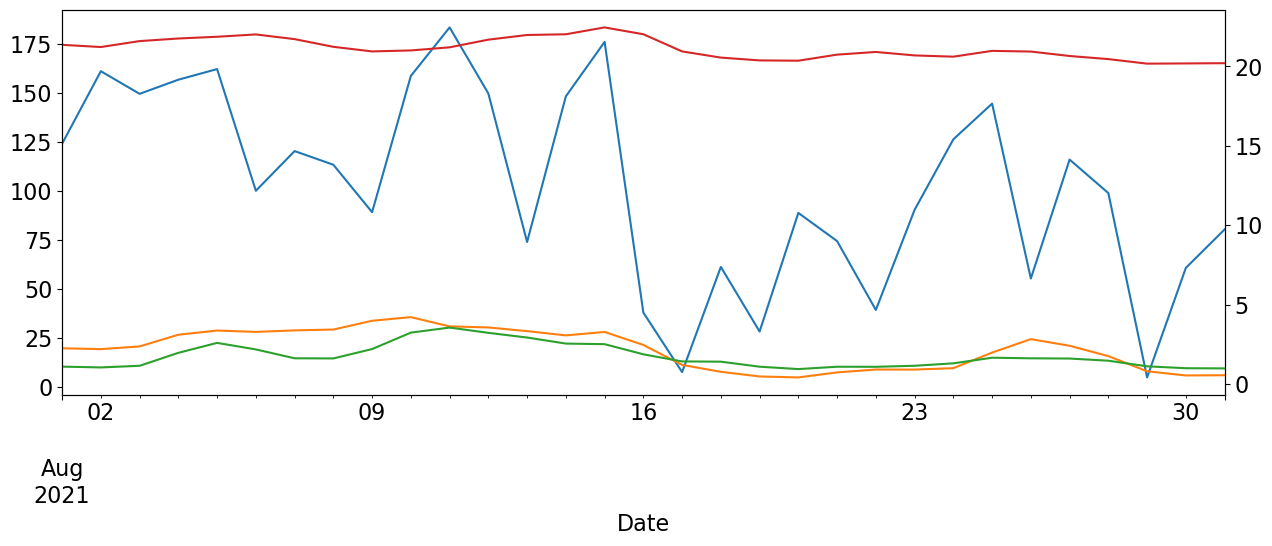

In [56]:
period = '2021-08'
ax1 = Weather['direct_radiation (W/m²)'][period].resample('d').mean().plot(figsize=(15,5))
BEV['BEV GEM Chlorofyl A'][period].resample('d').mean().plot(ax=ax1, secondary_y=True);
BEV['BEV GEM Turbiditeit'][period].resample('d').mean().plot(ax=ax1, secondary_y=True);
BEV['BEV GEM Temp'][period].resample('d').mean().plot(ax=ax1, secondary_y=True);

(0.0, 40.0)

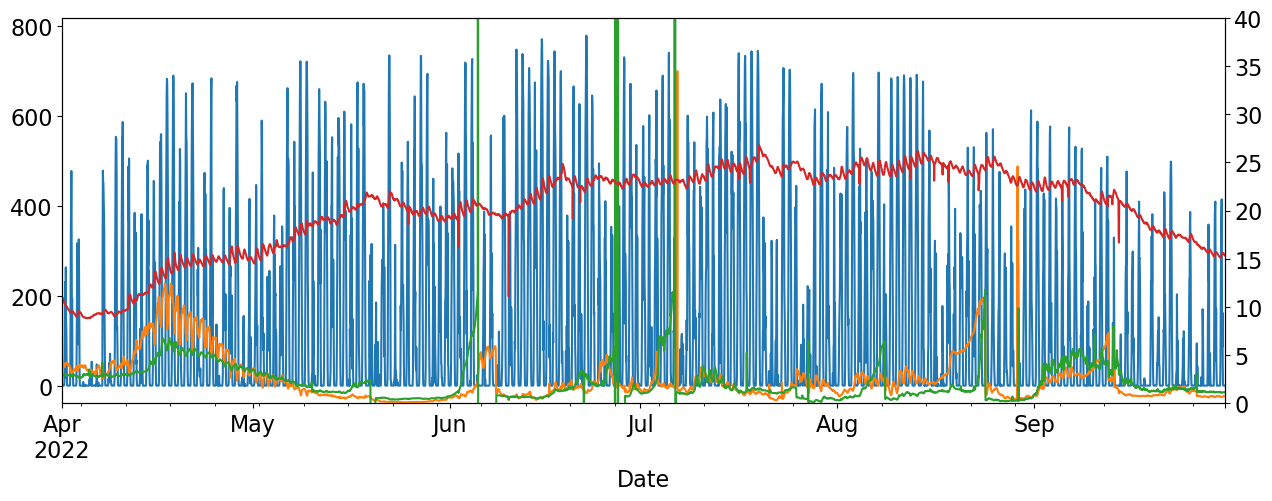

In [57]:
start = '2022-04'
end = '2022-09'
ax1 = Weather['direct_radiation (W/m²)'][start:end].plot(figsize=(15,5))
BEV['BEV GEM Chlorofyl A'][start:end].plot(ax=ax1, secondary_y=True);
BEV['BEV GEM Turbiditeit'][start:end].plot(ax=ax1, secondary_y=True);
BEV['BEV GEM Temp'][start:end].plot(ax=ax1, secondary_y=True);
ax1.right_ax.set_ylim(0,40)

(0.0, 30.0)

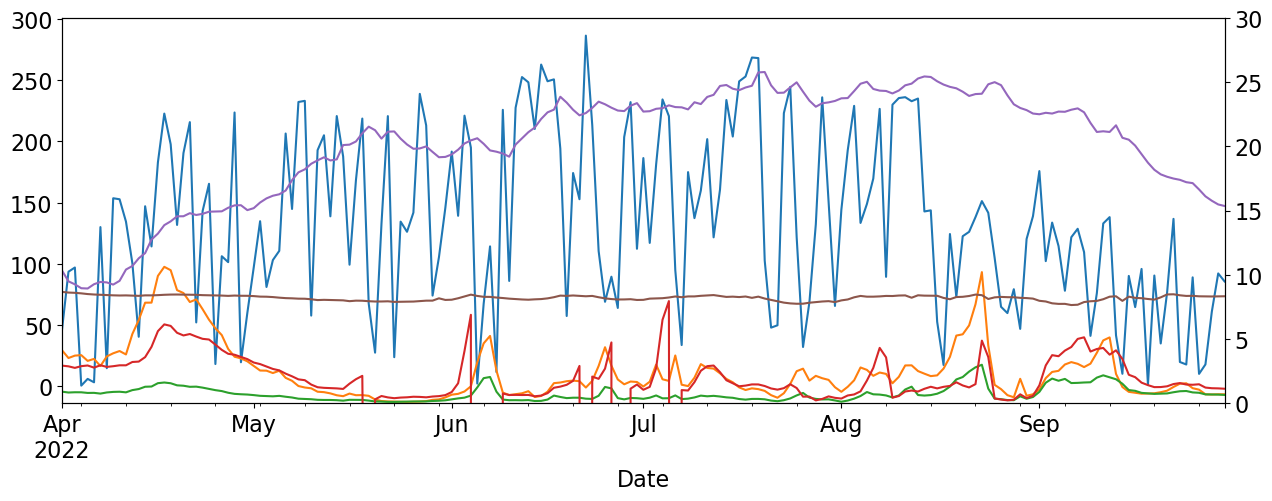

In [114]:
start = '2022-04'
end = '2022-09'
ax1 = Weather['direct_radiation (W/m²)'][start:end].resample('d').mean().plot(figsize=(15,5))
SCADA_data['BEV GEM Chlorofyl A'][start:end].resample('d').mean().plot(ax=ax1, secondary_y=True);
SCADA_data['BEV GEM phycocyanine (Blauwgroen algen)'][start:end].resample('d').mean().plot(ax=ax1, secondary_y=True);
SCADA_data['BEV GEM Turbiditeit'][start:end].resample('d').mean().plot(ax=ax1, secondary_y=True);
SCADA_data['BEV GEM Temp'][start:end].resample('d').mean().plot(ax=ax1, secondary_y=True);
ax1.right_ax.set_ylim(0,30)

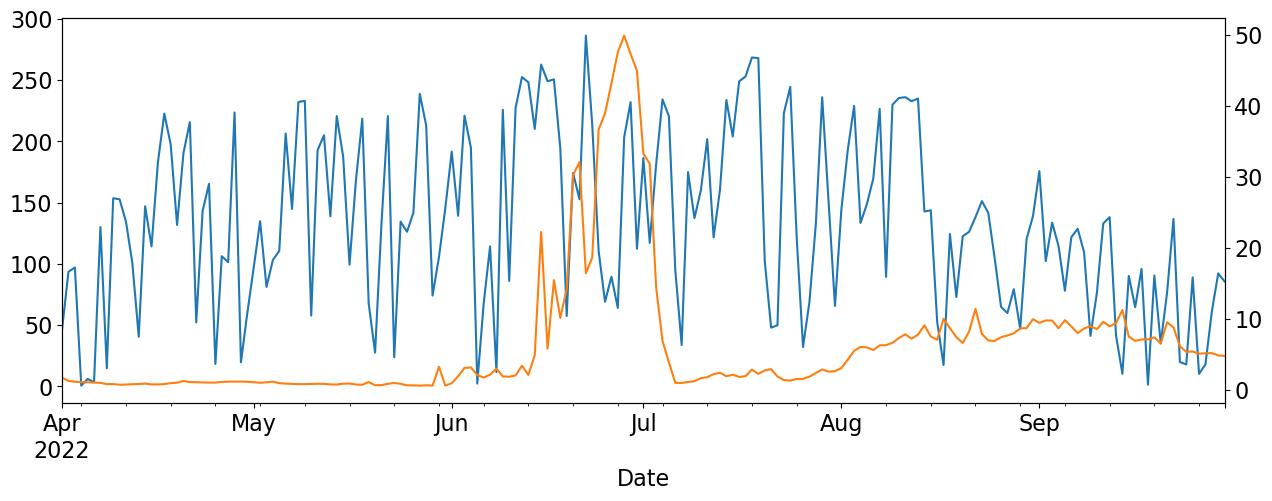

In [59]:
ax1 = Weather['direct_radiation (W/m²)'][start:end].resample('d').mean().plot(figsize=(15,5))
FLT['FLT GEM Turb influent even'][start:end].resample('d').mean().plot(ax=ax1, secondary_y=True);

(0.0, 40.0)

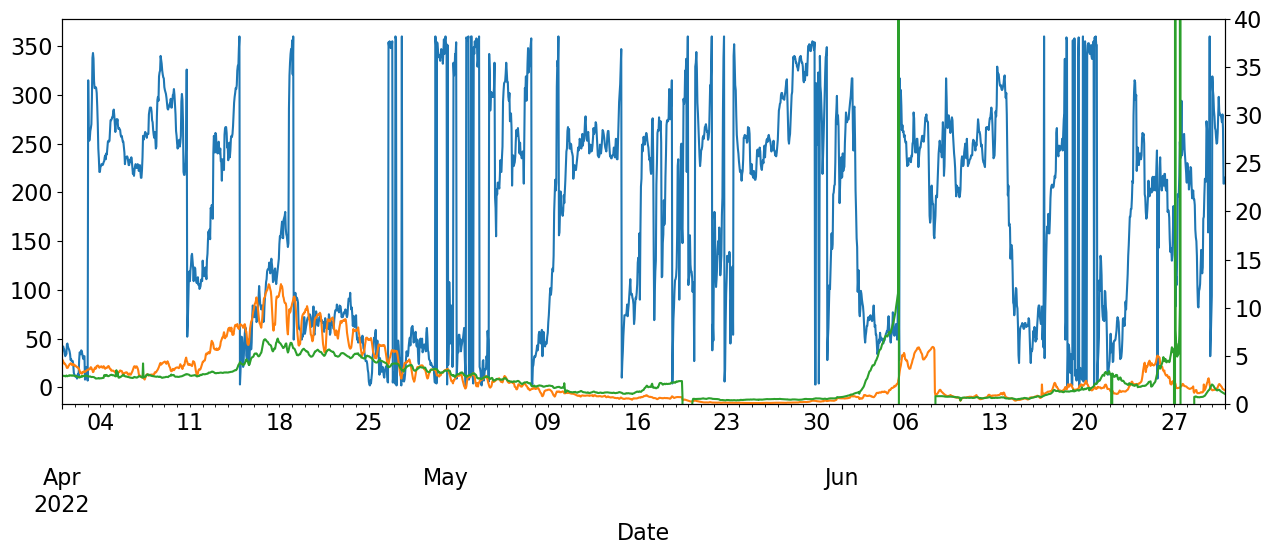

In [60]:
start = '2022-04'
end = '2022-06'
ax1 = Weather['wind_direction_10m (°)'][start:end].plot(figsize=(15,5))
BEV['BEV GEM Chlorofyl A'][start:end].plot(ax=ax1, secondary_y=True);
BEV['BEV GEM Turbiditeit'][start:end].plot(ax=ax1, secondary_y=True);
ax1.right_ax.set_ylim(0,40)

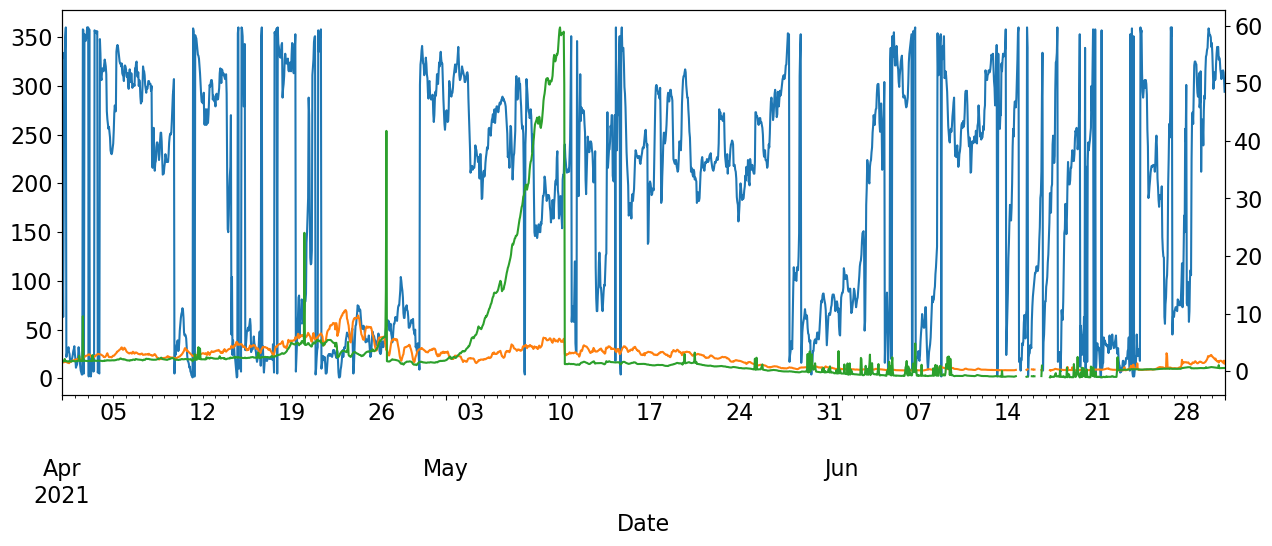

In [61]:
period = ['2022-04:2022-06']
ax1 = Weather['wind_direction_10m (°)']['2021-04':'2021-06'].plot(figsize=(15,5))
BEV['BEV GEM Chlorofyl A']['2021-04':'2021-06'].plot(ax=ax1, secondary_y=True);
BEV['BEV GEM Turbiditeit']['2021-04':'2021-06'].plot(ax=ax1, secondary_y=True);

# PCA

## define functions

In [83]:
def PCAskl(df, colorbar, path=r'PCAfigure', cbar='$THM$', marksize=50, savepath=None):
    '''PCAskl(X_std, colorbar)
    
    Xstd: the matrix of elements to be analized, one column per variable
    colorbar: is a vector of elements that can be used as rgb values
    cbar: text for colorbar name
    marksize= vector for sizes of circles
    savepath= None (does nothing) or path ending with name of figure (saves the figure)
    
    '''

    dat = (df - df.mean()) / (df.max() - df.min())
    
    n = len(dat.columns)
    
    pca = PCA(n_components=n)
    pca.fit(dat)
    pca_score = pca.explained_variance_ratio_
    H = pca.components_
    X = pca.transform(dat)
    expvar = pca.explained_variance_ratio_  

    xvector = pca.components_[0] #PC1 # see 'prcomp(my_data)$rotation' in R
    yvector = pca.components_[1] #PC2
    
    xexpvar = pca.explained_variance_ratio_[0] 
    yexpvar = pca.explained_variance_ratio_[1]
    zexpvar = pca.explained_variance_ratio_[2]
    x2expvar = pca.explained_variance_ratio_[3]
    
    xs = pca.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
    ys = pca.transform(dat)[:,1]
    # visualize projections
    # Note: scale values for arrows and text are a bit inelegant as of now,
    #       so feel free to play around with them

    with plt.style.context("seaborn-paper"):
        with plt.style.context("seaborn-white"):
            fig, ax1 = plt.subplots(figsize=(7,5))

            for i in range(len(xvector)):
            # arrows project features (ie columns from csv) as vectors onto PC axes
                plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
                          color='r', 
                          width=0.0005, 
                          head_width=0.0025)
                plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
                         list(dat.columns.values)[i], 
                         color='r')

            cmap = plt.get_cmap('coolwarm')
            
    
            plt.scatter(X[:,0], X[:,1], 
                        c=colorbar, 
                        cmap=cmap, 
                        s=marksize)
#             plt.ylim(-0.8,1)
            plt.xlabel('PC1')
            plt.ylabel('PC2')

            clb = plt.colorbar()
            clb.set_label('$Turbidity^-$ $(NTU)$')
            ax1.spines['top'].set_visible(False);
            ax1.spines['right'].set_visible(False);
    if pd.isnull(savepath)==False:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()
    
    return(H, X, expvar, xvector, yvector,
#            xvector,
#            yvector,
#            xs,
#            ys,
#            xexpvar,
#            yexpvar,
#            zexpvar,
          )

## PCA to predict FLT influent turbidity

In [219]:
df_PCA = pd.DataFrame()

In [220]:
df_PCA = pd.merge(pd.merge(pd.merge(pd.merge(WVL, SPE, left_index=True, right_index=True), 
                                    BEV, left_index=True, right_index=True), 
                           FLT, left_index=True, right_index=True),
                  Weather, left_index=True, right_index=True)

In [221]:
df_PCA = df_PCA.interpolate(method='linear', limit_direction='both').dropna()

In [222]:
list(df_PCA.columns)

['WVL GEM pH',
 'WVL GEM Conductiviteit',
 'WVL GEM Temp',
 'WVL GEM Zuurstof',
 'WVL GEM Turbiditeit',
 'WVL GEM Nitraat',
 'WVL GEM Chlorofyl A',
 'WVL GEM phycocyanine (Blauwgroen algen)',
 'WVL GEM TOC',
 'WVL GEM UV254 (SAC)',
 'WVL GEM Patroon alarm',
 'WVL GEM Spectraal alarm',
 'WVL GEM Temeratuur',
 'WVL GEM Niveau Nete kanaal',
 'SPE GEM Niveau Spaarbekken Eekhoven',
 'SPE GEM Temp',
 'SPE GEM Conductiviteit',
 'SPE GEM Niveau kanaal',
 'SPE GEM Chlorofyl A',
 'SPE GEM phycocyanine (Blauwgroen algen)',
 'SPE GEM Klep van spaarbekken Eekhoven',
 'SPE GEM Klep van spaarbekken Eekhoven',
 'SPE GEM Klep van omloopleiding',
 'SPE GEM Klep van omloopleiding',
 'SPE GEM Klep van spaarbekken Eekhoven',
 'SPE GEM Klep van spaarbekken Eekhoven',
 'SPE GEM Klep van omloopleiding',
 'SPE GEM Klep van omloopleiding',
 'BEV GEM Niveau',
 'BEV GEM pH',
 'BEV GEM Conductiviteit',
 'BEV GEM Temp',
 'BEV GEM Zuurstof',
 'BEV GEM Turbiditeit',
 'BEV GEM Nitraat',
 'BEV GEM Chlorofyl A',
 'BEV G

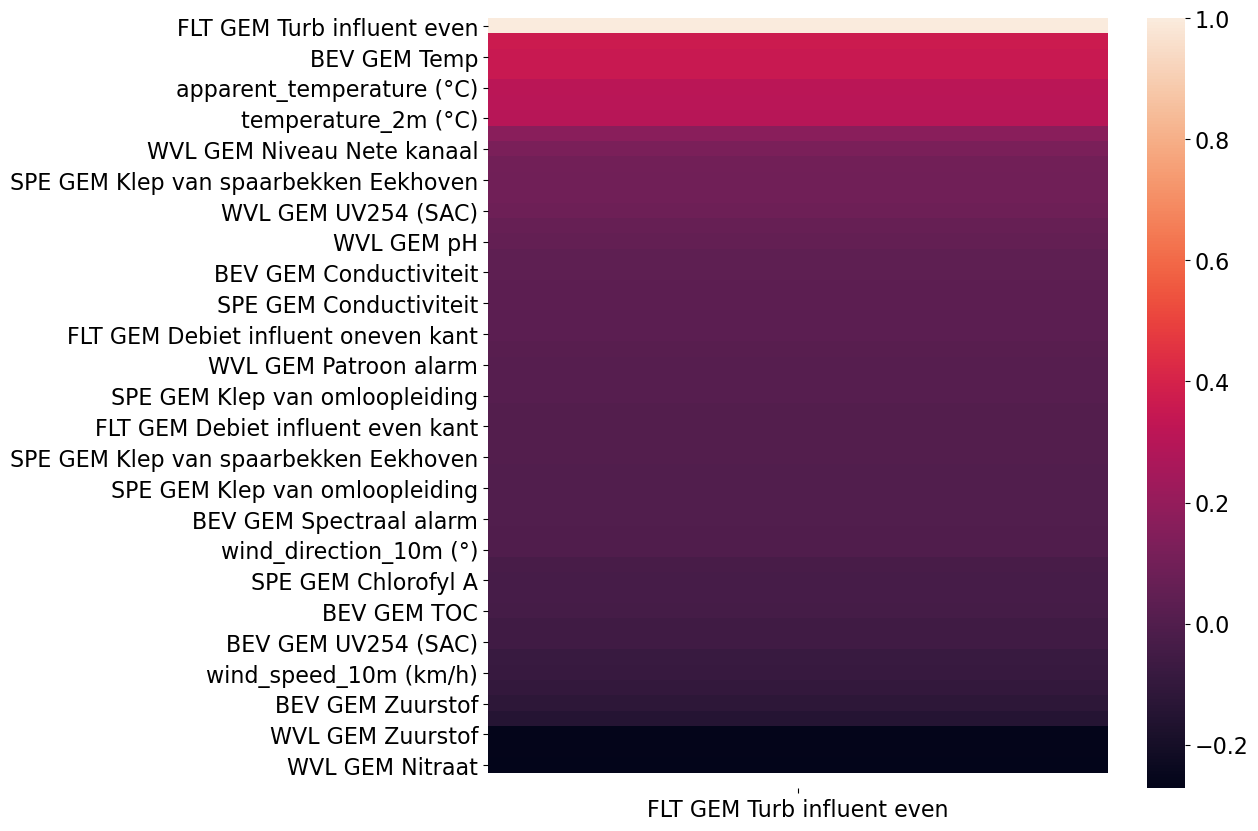

In [223]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.heatmap(df_PCA.corr().sort_values(by='FLT GEM Turb influent even', ascending=False)[['FLT GEM Turb influent even']])

### Generate PCA model

In [257]:
PCAcolumns = ['WVL GEM pH',
                'WVL GEM Conductiviteit',
                 'WVL GEM Temp',
                 'WVL GEM Turbiditeit',
                 'WVL GEM Nitraat',
                 'WVL GEM Chlorofyl A',
                 'WVL GEM phycocyanine (Blauwgroen algen)',
                 'WVL GEM Temeratuur',
                 'SPE GEM Temp',
                 'SPE GEM Conductiviteit',
                 'SPE GEM Chlorofyl A',
                 'SPE GEM phycocyanine (Blauwgroen algen)',
                 'BEV GEM Niveau',
                 'BEV GEM pH',
                 'BEV GEM Conductiviteit',
                 'BEV GEM Temp',
                 'BEV GEM Turbiditeit',
                 'BEV GEM Nitraat',
                 'BEV GEM Chlorofyl A',
                 'BEV GEM phycocyanine (Blauwgroen algen)',
                 'BEV GEM TOC',
                 'BEV GEM UV254 (SAC)',
                 'temperature_2m (°C)',
                 'apparent_temperature (°C)',
                 'wind_speed_10m (km/h)',
                 'wind_direction_10m (°)',
                 'direct_radiation (W/m²)',
             ]

In [258]:
training_df_len = 3000
training_df = df_PCA[PCAcolumns][:training_df_len]
target = df_PCA['FLT GEM Turb influent even'][:training_df_len]

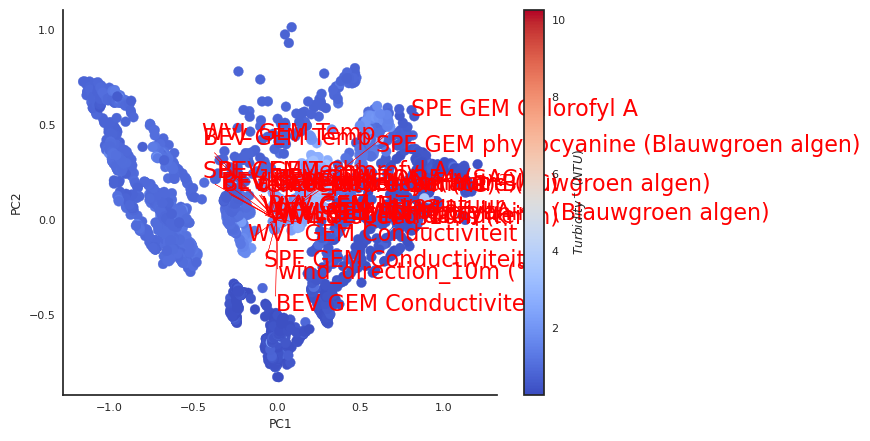

In [259]:
H, X, expvar, xvector, yvector = PCAskl(training_df[PCAcolumns], target)

In [260]:
# PCR
howmanyPCAs = 4;

reg = linear_model.LinearRegression()
reg.fit(X[:,:howmanyPCAs], target)
predicted = reg.predict(X[:,:howmanyPCAs])
r2r=reg.score(X[:,:howmanyPCAs], target)
X_pca=pd.DataFrame(X[:,:howmanyPCAs], columns=['PC1','PC2', 'PC3', 'PC4'])
coeff_df = pd.DataFrame(reg.coef_, X_pca.columns, columns=['Coefficient'])  

coeff_df

Coefficient
PC1    -0.030664
PC2     0.779491
PC3     0.933442
PC4    -0.066692

In [261]:
reg.intercept_

1.0973703024752905

In [262]:
r2r

0.25702829860024534

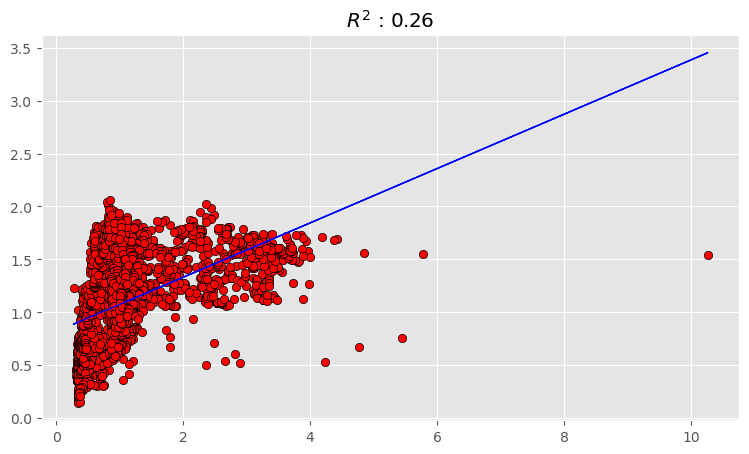

In [263]:
z = np.polyfit(target, predicted, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(target, predicted, c='red', edgecolors='k')
    ax.plot(target, z[1]+z[0]*target, c='blue', linewidth=1)

    plt.title('$R^{2}$ : '+str(r2r.round(2)))
#     plt.xlabel('Measured $')
#     plt.ylabel('Predicted $^{\circ}$Brix')
plt.show()

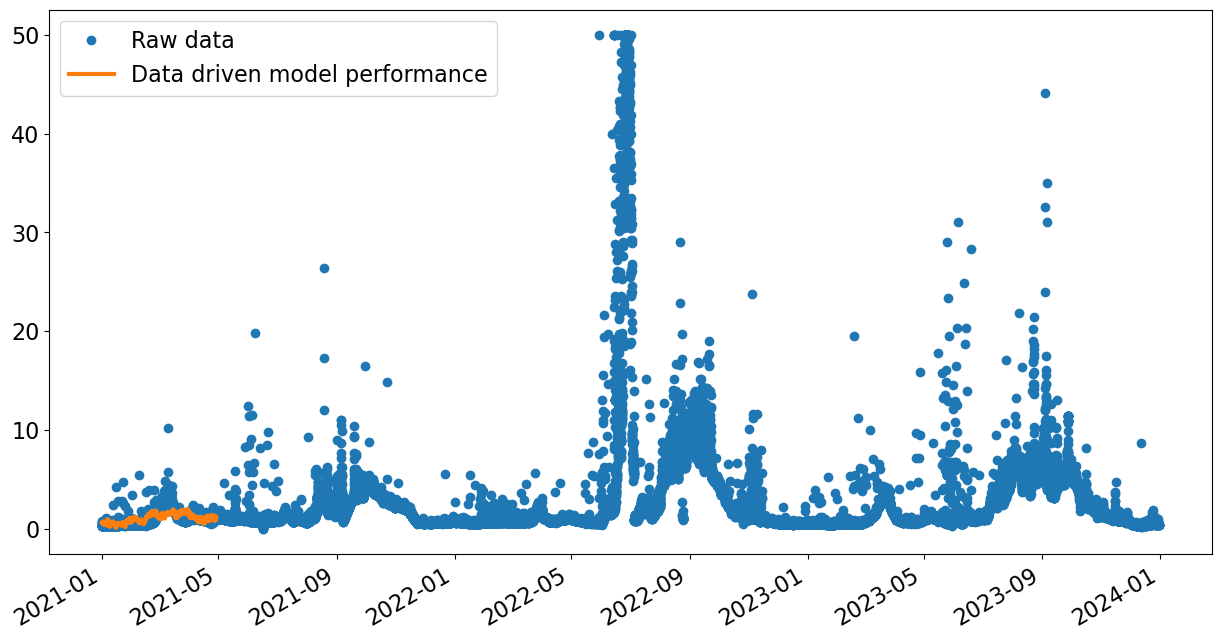

In [268]:
ax1 = df_PCA['FLT GEM Turb influent even'].plot(figsize=(15, 8),  legend=False, marker='o', linestyle='',
                             label='Raw data');

plt.plot(pd.DataFrame(predicted, target.index), 
         linewidth=3, label='Data driven model performance')
leg = ax1.legend();